In this note book we will take a look at the stock market S&P 500, using the data S&P 500 from 2018 to 2022

Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

Data
Using data from S&P 500 Historical Data 2018 to 2022

In [28]:
df = pd.read_csv("./Bitcoin Historical Data - Investing.com 2018 to 2022.csv", parse_dates=['Date'])

In [29]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-01-01,"47,738.00","46,217.50","47,917.60","46,217.50",31.24K,3.29%
1,2021-12-31,"46,219.50","47,123.30","48,553.90","45,693.60",58.18K,-1.92%
2,2021-12-30,"47,123.30","46,470.70","47,901.40","46,003.00",60.96K,1.42%
3,2021-12-29,"46,461.70","47,548.40","48,121.70","46,127.80",63.92K,-2.28%
4,2021-12-28,"47,545.20","50,703.40","50,703.80","47,345.70",74.39K,-6.18%


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1462 non-null   datetime64[ns]
 1   Price     1462 non-null   object        
 2   Open      1462 non-null   object        
 3   High      1462 non-null   object        
 4   Low       1462 non-null   object        
 5   Vol.      1462 non-null   object        
 6   Change %  1462 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 80.1+ KB


convert number data from string to float

In [31]:
# convert million, billion, thousand into number
def converter(x):
  if 'M' in x:
    return float(x.strip('M'))*1000000
  elif 'B' in x:
    return float(x.strip('B'))*1000000000
  elif 'K' in x:
    return float(x.strip('K'))*100000

# convert string percentage to number percentage
def p2f(x):
  if '%' in x:
    return float(x.strip('%'))/100


In [32]:
df['Vol.'] = df['Vol.'].apply(converter)

In [33]:
df['Change %'] = df['Change %'].apply(p2f)

In [34]:
df['Price'] = df['Price'].str.replace(',','').astype(float)
df['Open'] = df['Open'].str.replace(',','').astype(float)
df['High'] = df['High'].str.replace(',','').astype(float)
df['Low'] = df['Low'].str.replace(',','').astype(float)

adding close column with the opening data starting from date 2, and remove the last row

In [35]:
df['Close'] = df['Open']
df['Close'] = df['Close'].shift(-1)
df = df.drop(df.index[-1])
df

,Date,Price,Open,High,Low,Vol.,Change %,Close
0,2022-01-01,47738.00,46217.50,47917.60,46217.50,3124000.00,0.03,47123.30
1,2021-12-31,46219.50,47123.30,48553.90,45693.60,5818000.00,-0.02,46470.70
2,2021-12-30,47123.30,46470.70,47901.40,46003.00,6096000.00,0.01,47548.40
3,2021-12-29,46461.70,47548.40,48121.70,46127.80,6392000.00,-0.02,50703.40
4,2021-12-28,47545.20,50703.40,50703.80,47345.70,7439000.00,-0.06,50783.60
...,...,...,...,...,...,...,...,...
1456,2018-01-06,17172.30,16954.80,17252.80,16286.60,8393000.00,0.01,15180.10
1457,2018-01-05,16954.80,15180.10,17126.90,14832.40,14196000.00,0.12,15156.50
1458,2018-01-04,15180.10,15156.50,15408.70,14244.70,11097000.00,0.00,14754.10
1459,2018-01-03,15156.60,14754.10,15435.00,14579.70,10654000.00,0.03,13444.90


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1461 non-null   datetime64[ns]
 1   Price     1461 non-null   float64       
 2   Open      1461 non-null   float64       
 3   High      1461 non-null   float64       
 4   Low       1461 non-null   float64       
 5   Vol.      1461 non-null   float64       
 6   Change %  1461 non-null   float64       
 7   Close     1461 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 102.7 KB


In [37]:
df.describe()

,Price,Open,High,Low,Vol.,Change %,Close
count,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00
mean,18380.12,18356.81,18873.10,17778.82,29006963.72,0.00,18334.66
std,17770.92,17754.88,18261.26,17177.73,26984084.38,0.04,17740.28
min,3228.70,3228.60,3282.30,3177.00,26000.00,-0.39,3228.60
25%,7080.80,7080.80,7284.40,6852.50,7537000.00,-0.02,7080.80
50%,9454.80,9454.50,9672.30,9243.10,16189000.00,0.00,9454.50
75%,29359.90,28951.70,29627.10,28204.50,49777000.00,0.02,28866.80
max,67527.90,67528.70,68990.60,66334.90,99953000.00,0.19,67528.70


In [38]:
df.shape

(1461, 8)

EDA Bitcoin 2018 - 2021

In [39]:
# df = pd.read_csv("./S&P 500 Enhanced Futures Historical Data.csv", parse_dates=['Date'])
# remove the first row and sort by date
df = df.iloc[1: , :]
df = df.sort_values(by='Date')
df = df.reset_index(drop=True)

In [40]:
# save new data to file
df.to_csv('Bitcoin Enhanced Historical Data - Investing.com 2018 to 2022.csv', index=False)

In [41]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Close
0,2018-01-02,14754.10,13444.90,15306.10,12934.20,13773000.00,0.10,13850.50
1,2018-01-03,15156.60,14754.10,15435.00,14579.70,10654000.00,0.03,13444.90
2,2018-01-04,15180.10,15156.50,15408.70,14244.70,11097000.00,0.00,14754.10
3,2018-01-05,16954.80,15180.10,17126.90,14832.40,14196000.00,0.12,15156.50
4,2018-01-06,17172.30,16954.80,17252.80,16286.60,8393000.00,0.01,15180.10
...,...,...,...,...,...,...,...,...
1455,2021-12-27,50678.20,50783.60,52016.30,50459.00,4390000.00,-0.00,50404.00
1456,2021-12-28,47545.20,50703.40,50703.80,47345.70,7439000.00,-0.06,50783.60
1457,2021-12-29,46461.70,47548.40,48121.70,46127.80,6392000.00,-0.02,50703.40
1458,2021-12-30,47123.30,46470.70,47901.40,46003.00,6096000.00,0.01,47548.40


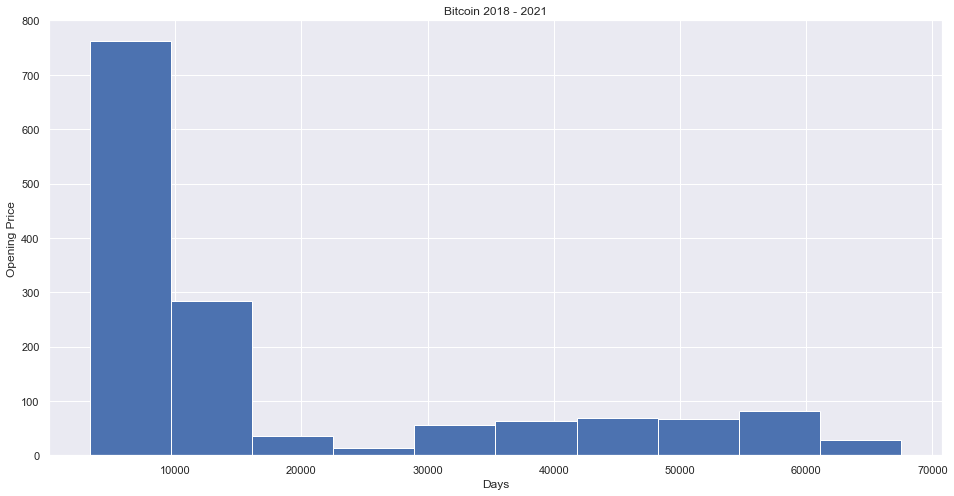

In [42]:
# visualizing the opening prices
plt.figure(figsize=(16,8))
plt.title('Bitcoin 2018 - 2021')
plt.xlabel('Days')
plt.ylabel('Opening Price')
plt.hist(df['Open'])
plt.show()

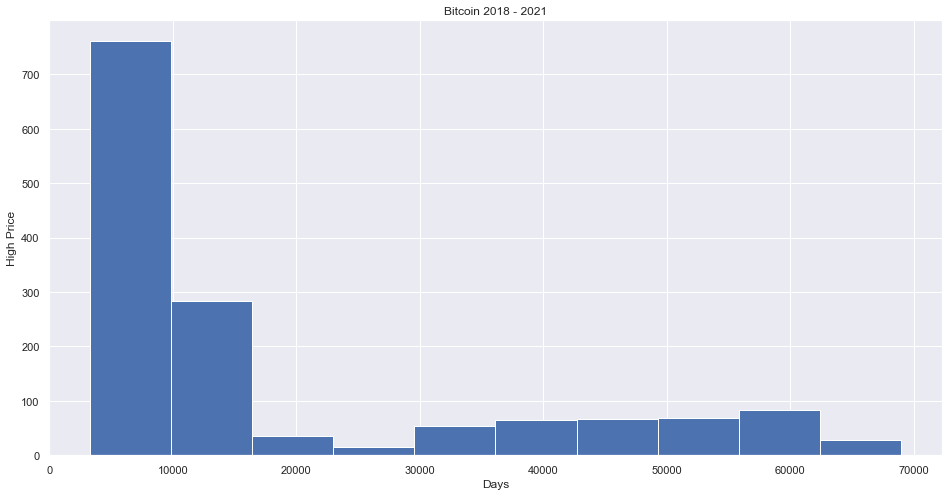

In [43]:
# visualizing the High prices
plt.figure(figsize=(16,8))
plt.title('Bitcoin 2018 - 2021')
plt.xlabel('Days')
plt.ylabel('High Price')
plt.hist(df.High)
plt.show()

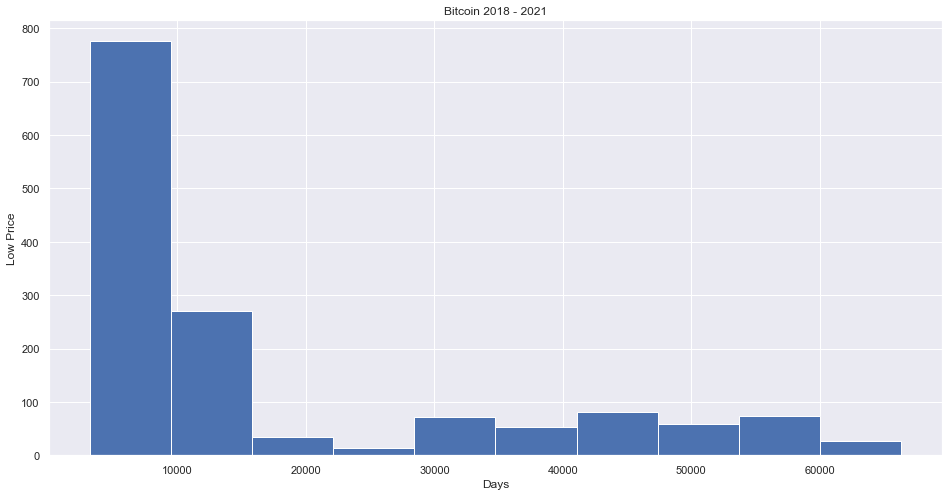

In [44]:
# visualizing the Low prices
plt.figure(figsize=(16,8))
plt.title('Bitcoin 2018 - 2021')
plt.xlabel('Days')
plt.ylabel('Low Price')
plt.hist(df.Low)
plt.show()

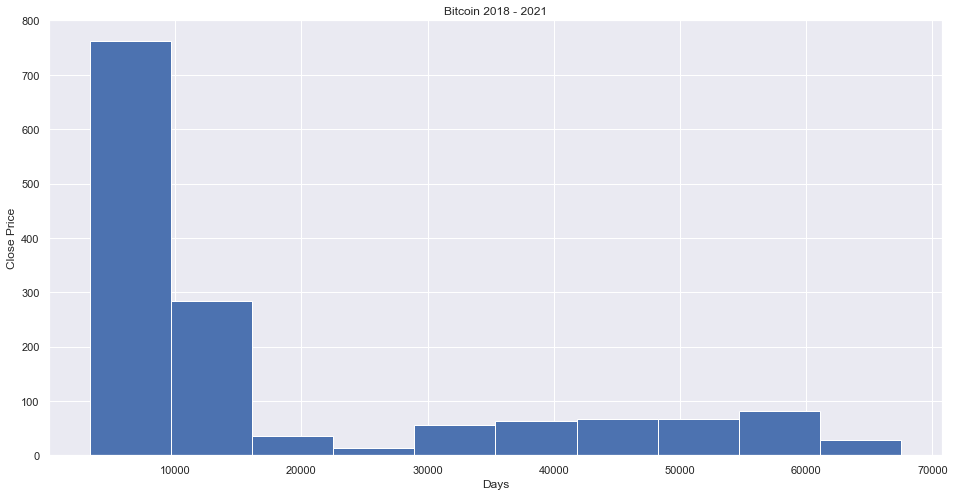

In [45]:
# visualizing the Close prices
plt.figure(figsize=(16,8))
plt.title('Bitcoin 2018 - 2021')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.hist(df.Close)
plt.show()

Yearly Growth

In [46]:
year_group = df.groupby(df.Date.dt.year).mean()
year_group

,Price,Open,High,Low,Vol.,Change %,Close
Date,,,,,,,
2018,7535.97,7562.67,7770.66,7282.19,21297780.22,-0.00,7590.24
2019,7371.82,7362.25,7546.21,7174.75,51631934.25,0.00,7352.80
2020,11111.63,11052.13,11318.35,10808.51,32788409.84,0.00,10993.10
2021,47410.84,47364.29,48767.88,45762.24,10349161.64,0.00,47314.28


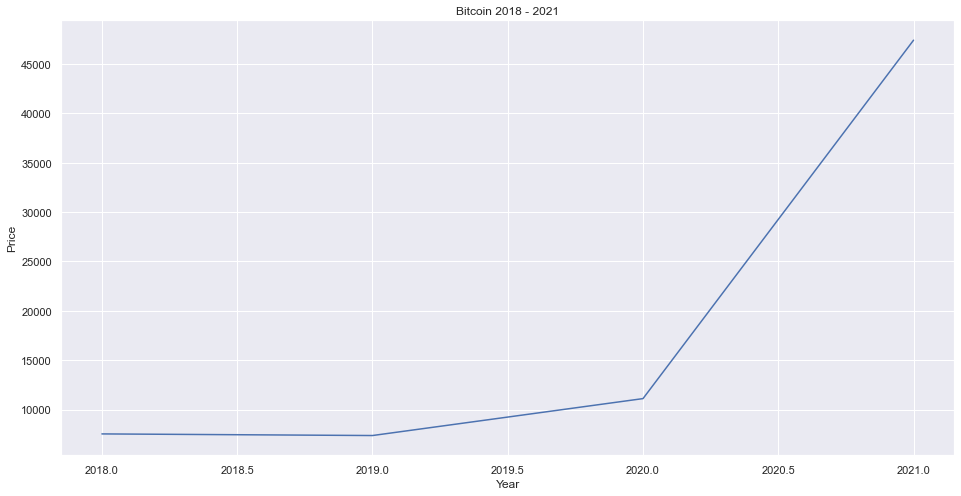

In [47]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin 2018 - 2021')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(year_group['Price'])
plt.show()

#--> Bitcoin perform well overall and there is a multiply from 2022 to 2021

Monthly growth

In [48]:
month_group = df.groupby([df.Date.dt.month, df.Date.dt.year]).mean()
month_group.head()

Price     Open     High      Low        Vol.  Change %    Close
Date Date                                                                   
1    2018 12988.82 13094.70 13606.97 12220.04 15881100.00     -0.01 13217.51
     2019  3653.34  3662.13  3713.90  3597.11 50378387.10     -0.00  3673.58
     2020  8378.80  8309.39  8497.09  8176.44 56809419.35      0.01  8236.91
     2021 34745.08 34601.79 36260.61 32546.64 17697838.71      0.01 34427.12
2    2018  9402.89  9399.63  9883.05  8856.86 30513714.29      0.00  9384.70

In [49]:
monthly_dict = {
  2018: [],
  2019: [],
  2020: [],
  2021: [] 
  }
for index, row in month_group.iterrows():
  if index[1] in monthly_dict.keys():
    monthly_dict[index[1]].append(row['Price'])
  else:
    monthly_dict[index[1]] = [row['Price']]

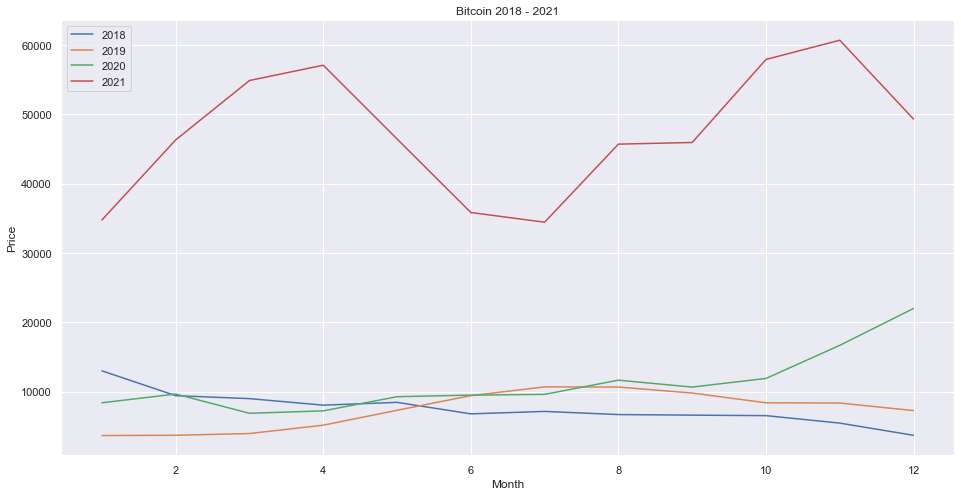

In [50]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin 2018 - 2021')
plt.xlabel('Month')
plt.ylabel('Price')
plt.plot(range(1, len(monthly_dict[2018]) + 1), monthly_dict[2018])
plt.plot(range(1, len(monthly_dict[2019]) + 1), monthly_dict[2019])
plt.plot(range(1, len(monthly_dict[2020]) + 1), monthly_dict[2020])
plt.plot(range(1, len(monthly_dict[2021]) + 1), monthly_dict[2021])
plt.legend(['2018', '2019', '2020', '2021'])
plt.show()

# --> Overall the Bitcoin perform not very well in 2018 and 2019. However, it start to increase drastically in 2020 and 2021

Exploring Volume

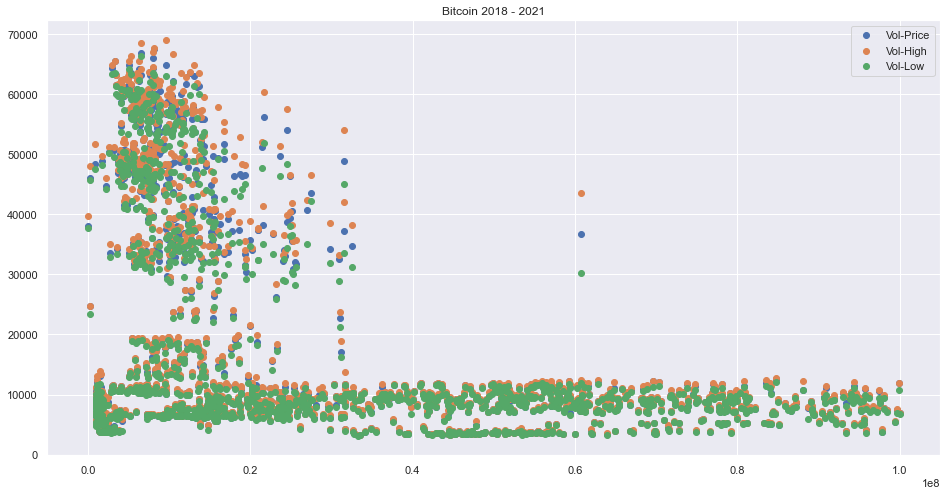

In [51]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin 2018 - 2021')
plt.scatter(df['Vol.'], df.Price)
plt.scatter(df['Vol.'], df.High)
plt.scatter(df['Vol.'], df.Low)
plt.legend(['Vol-Price', 'Vol-High', 'Vol-Low'])
plt.show()

# --> There are no relationship between Vol with Price, High, and Low

Correlation plot for Price, Openning Price, Volume

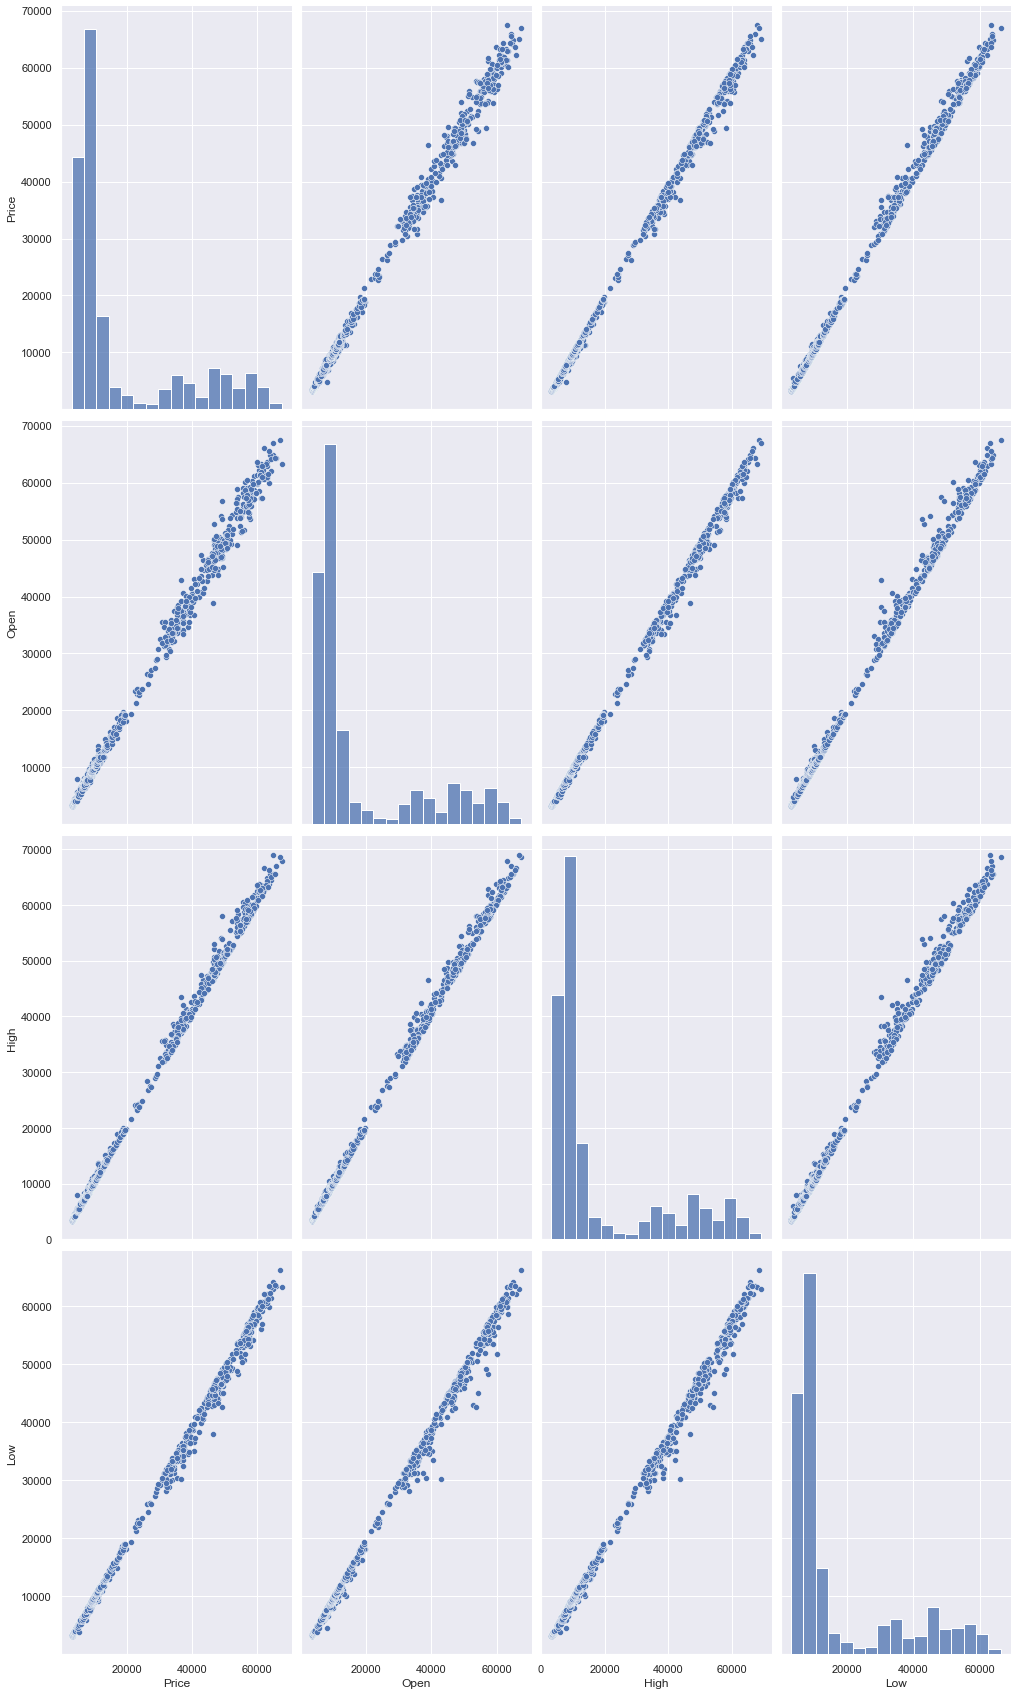

In [52]:
sns.set(font_scale=1)
sns.pairplot(df[['Price','Open', 'High', 'Low']], height=6, aspect=0.6)

# --> there are strong correlation between Price, Open, High, and Low
# --> I think there is something wrong ~~